In [64]:
import pandas
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro

In [65]:
def norm (data):
    stat, p = shapiro(data)
    if p<0.05:
        verdict="Not normal"
    else:
        verdict="Normal"
    print("Statistics =","{:.5f}".format(stat),"\n" ,"P-value =", "{:.5f}".format(p), "\n", verdict)
    data.hist()

In [66]:
def log(data):
    stat, p = shapiro(np.log(data))
    if p<0.05:
        verdict="Not normal"
    else:
        verdict="Normal"
    print("Statistics =","{:.5f}".format(stat),"\n" ,"P-value =", "{:.5f}".format(p), "\n", verdict)
    np.log(data).hist(density=1)

In [67]:
def corr(data):
    X = data.drop(['price'], axis=1)
    y = data['price']
    return X.corr()

In [103]:
def regression_coef(data,flag=False):
    X = data.drop(['price'], axis=1)
    y = data['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    print("R^2 =","{:.2f}".format(model.score(X_train, y_train)))
    
    coef = pandas.DataFrame(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist()),
                    columns=['predictor', 'coef'])
    X1 = np.append(np.ones((len(X),1)), X, axis=1)
    b = np.append(model.intercept_, model.coef_)
    MSE = np.sum((model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
    var_b = MSE * (np.linalg.inv(np.dot(X1.T, X1)).diagonal())
    sd_b = np.sqrt(var_b)
    t = b / sd_b
    coef['pvalue'] = ["{:.5f}".format(2 * (1 - stats.t.cdf(np.abs(i), (len(X1) - 1)))) for i in t]
    print(coef) 
    if flag:
        return X_train, X_test, y_train, y_test, model

In [69]:
data = pandas.read_csv('auto.csv',sep=';', encoding="cp1252")
#data.info()

/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,2,4,6,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [70]:
data=data.iloc[:,1:11]

In [71]:
list1=[]
for columns in data:
    if data[columns].dtype=="O":
        list1.append(columns)

In [72]:
data.dropna(subset=list1, inplace=True)
data=data[data['price']> 1]
data.shape

(151, 10)

In [73]:
for column in list1:
    mydict={}
    unique=data[column].unique()
    for i in range(len(unique)):
        d={unique[i]:i}
        mydict.update(d)
    print(mydict)
    data[column.upper()]=data[column].replace(mydict)
ndata=data.drop((column for column in list1), axis=1)
ndata.head()

{'kleinwagen': 0, 'limousine': 1, 'cabrio': 2, 'kombi': 3, 'suv': 4, 'bus': 5, 'coupe': 6, 'andere': 7}
{'manuell': 0, 'automatik': 1}
{'golf': 0, 'fabia': 1, '3er': 2, '2_reihe': 3, '3_reihe': 4, 'passat': 5, 'navara': 6, 'twingo': 7, 'c_max': 8, 'a_klasse': 9, 'scirocco': 10, '5er': 11, 'arosa': 12, 'andere': 13, 'civic': 14, 'transporter': 15, 'punto': 16, 'e_klasse': 17, 'one': 18, 'clio': 19, '1er': 20, 'b_klasse': 21, 'astra': 22, 'fortwo': 23, 'a8': 24, 'jetta': 25, 'polo': 26, 'fiesta': 27, 'c_klasse': 28, 'micra': 29, 'vito': 30, 'sprinter': 31, '156': 32, 'escort': 33, 'forester': 34, 'scenic': 35, 'a1': 36, 'combo': 37, 'focus': 38, 'tt': 39, 'a6': 40, 'jazz': 41, 'slk': 42, '7er': 43, '80': 44, '147': 45, 'glk': 46, 'z_reihe': 47, 'v40': 48, 'ibiza': 49, 'mustang': 50, 'eos': 51, 'a4': 52, 'touran': 53, 'getz': 54, 'insignia': 55, 'megane': 56, 'a3': 57, 'lupo': 58, 'r19': 59}
{'benzin': 0, 'diesel': 1}
{'nein': 0, 'ja': 1}


,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,VEHICLETYPE,GEARBOX,MODEL,FUELTYPE,NOTREPAIREDDAMAGE
3,1500.0,2001.0,75.0,150000.0,6.0,0,0,0,0,0
4,3600.0,2008.0,69.0,90000.0,7.0,0,0,1,1,0
5,650.0,1995.0,102.0,150000.0,10.0,1,0,2,0,1
6,2200.0,2004.0,109.0,150000.0,8.0,2,0,3,0,0
10,2000.0,2004.0,105.0,150000.0,12.0,1,0,4,0,0


Statistics = 0.76710 
 P-value = 0.00000 
 Not normal


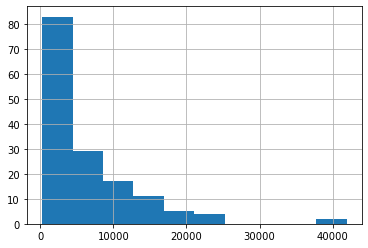

In [74]:
norm(ndata["price"])

In [75]:
ndata=ndata[ndata['price']<30000]
ndata.shape

(149, 10)

In [76]:
#ndata.describe()

Statistics = 0.84119 
 P-value = 0.00000 
 Not normal


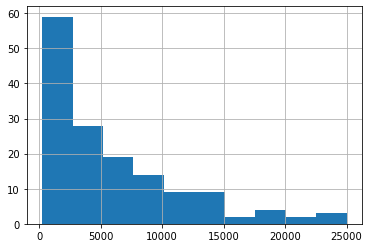

In [77]:
norm(ndata["price"])

Statistics = 0.97466 
 P-value = 0.00740 
 Not normal


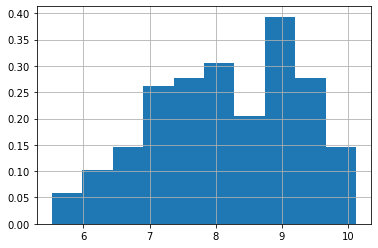

In [78]:
log(ndata["price"])

In [79]:
corr(ndata)

,yearOfRegistration,powerPS,kilometer,monthOfRegistration,VEHICLETYPE,GEARBOX,MODEL,FUELTYPE,NOTREPAIREDDAMAGE
yearOfRegistration,1.000000,0.183019,-0.254709,-0.017227,-0.030280,0.062116,-0.011176,0.334509,-0.101708
powerPS,0.183019,1.000000,-0.013006,0.124656,0.207595,0.456608,-0.008668,0.169621,0.011576
kilometer,-0.254709,-0.013006,1.000000,0.105233,0.150734,0.002822,-0.014349,0.176892,0.077674
monthOfRegistration,-0.017227,0.124656,0.105233,1.000000,0.044356,0.006439,-0.004445,0.007023,0.106138
VEHICLETYPE,-0.030280,0.207595,0.150734,0.044356,1.000000,0.042040,-0.018377,0.308621,-0.007459
GEARBOX,0.062116,0.456608,0.002822,0.006439,0.042040,1.000000,0.000449,0.224908,-0.070059
MODEL,-0.011176,-0.008668,-0.014349,-0.004445,-0.018377,0.000449,1.000000,0.020536,-0.047614
FUELTYPE,0.334509,0.169621,0.176892,0.007023,0.308621,0.224908,0.020536,1.000000,0.031563
NOTREPAIREDDAMAGE,-0.101708,0.011576,0.077674,0.106138,-0.007459,-0.070059,-0.047614,0.031563,1.000000


In [80]:
#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size=0.3, random_state=0)

In [81]:
#model = LinearRegression()
#model.fit(X_train, y_train)

In [82]:
#model.score(X_train, y_train)

In [104]:
#pandas.DataFrame({'variable':['intercept']+X.columns.tolist(),'coef':[model.intercept_]+model.coef_.tolist()})
regression_coef(ndata)

R^2 = 0.71
            predictor           coef   pvalue
0           intercept -301404.356205  0.00033
1  yearOfRegistration     154.576925  0.00022
2             powerPS      51.426085  0.00000
3           kilometer      -0.067628  0.00000
4   NOTREPAIREDDAMAGE   -2854.333510  0.00058


In [84]:
ndata=ndata.drop(["MODEL","GEARBOX", "MODEL", "FUELTYPE", "monthOfRegistration"], axis=1)

In [85]:
regression_coef(ndata)

R^2 = 0.72


,predictor,coef,pvalue
0,intercept,-315255.807398,0.00014
1,yearOfRegistration,161.434214,0.00009
2,powerPS,49.194667,0.00000
3,kilometer,-0.070543,0.00000
4,VEHICLETYPE,355.045439,0.00998
5,NOTREPAIREDDAMAGE,-2898.509522,0.00038


In [86]:
ndata=ndata.drop(["VEHICLETYPE"], axis=1)

In [105]:
X_train, X_test, y_train, y_test, model=regression_coef(ndata,True)

R^2 = 0.71
            predictor           coef   pvalue
0           intercept -301404.356205  0.00033
1  yearOfRegistration     154.576925  0.00022
2             powerPS      51.426085  0.00000
3           kilometer      -0.067628  0.00000
4   NOTREPAIREDDAMAGE   -2854.333510  0.00058


In [106]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

(0, 50000)

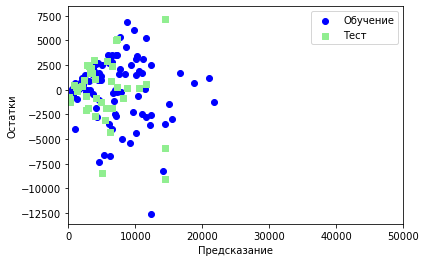

In [101]:
plt.xlabel('Предсказание')
plt.ylabel('Остатки')
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Обучение')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Тест')
plt.legend(loc='upper right')
plt.xlim([0, 50000])

In [102]:
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('MAE train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))

MSE train: 9873431.200, test: 10301363.651
MAE train: 2346.811, test: 2363.124
